In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline

if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2018


$H_0$: Trip duration of females on average is equal or higher than trip duration of males on average in Jan 2016

$H_1$: Trip duration of females on average is lower than trip duration of males on average in Jan 2016

Significance level: 0.05

In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201601'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12


In [5]:
df_2c = df[['tripduration', 'gender', 'date']]
df_2c.head()

,tripduration,gender,date
0,923,1,2016-01-01 00:00:41
1,379,1,2016-01-01 00:00:45
2,589,2,2016-01-01 00:00:48
3,889,2,2016-01-01 00:01:06
4,1480,1,2016-01-01 00:01:12


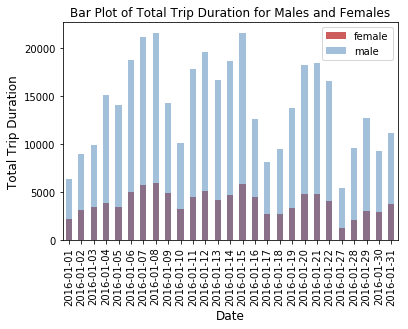

In [6]:
df_2c['tripduration'][df_2c['gender'] == 2].groupby(df_2c['date'].dt.date).count().plot(kind="bar", color='IndianRed', label='female')
ax = df_2c['tripduration'][df_2c['gender'] == 1].groupby(df_2c['date'].dt.date).count().plot(kind="bar", color='SteelBlue', alpha = 0.5, label='male')
pl.xlabel('Date', fontsize = 12)
pl.ylabel('Total Trip Duration', fontsize = 12)
pl.title('Bar Plot of Total Trip Duration for Males and Females', fontsize = 12)
pl.legend()

### Figure 1.
We can see that the total trip duration for males is higher than females across all the days of January 2016.

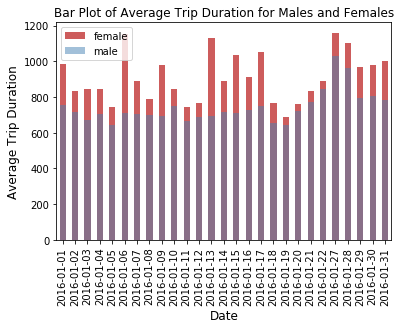

In [7]:
df_2c['tripduration'][df_2c['gender'] == 2].groupby(df_2c['date'].dt.date).mean().plot(kind="bar", color='IndianRed', label='female')
ax = df_2c['tripduration'][df_2c['gender'] == 1].groupby(df_2c['date'].dt.date).mean().plot(kind="bar", color='SteelBlue', alpha = 0.5, label='male')
pl.xlabel('Date', fontsize = 12)
pl.ylabel('Average Trip Duration', fontsize = 12)
pl.title('Bar Plot of Average Trip Duration for Males and Females', fontsize = 12)
pl.legend()

### Figure 2.
Here, we can see that the average trip duration for females is actually higher than males across all the days of January 2016.